# Exploration des données


## 1. Importation des données et configuration du data set


In [2]:

# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
df = pd.read_csv('../data/train.csv')



## 2. Nettoyage des données

In [3]:
round(df.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,959.0
std,0.0,1.0,0.0,0.0,0.0,0.0,5237.0
min,1.0,0.0,-122.0,34.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,662.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-61.0,52.0,-61.0,44.0,3526282.0


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.shape

(1458644, 11)

Il y 1,458,644 lignes et 11 colonnes :
id : identifiant unique de chaque course
vendor_id : un code qui indique le fournisseur associé à la donnée de la course
pickup_datetime : date et heure du départ
dropoff_datetime : date et heure de l'arrivée
passenger_count : le nombre de passagers dans le véhicule. Donnée renseignée par le chauffeur.
pickup_longitude, pickup_latitude : coordonnées au départ
dropoff_longitude, dropoff_latitude : coordonnées à l'arrivée
store_and_fwd_flag - Cet indicateur indique si la donnée de la course a été stockée dans la mémoire du véhicule parce qu'il n'était pas
connecté ou si elle a été envoyée en temps réel. (Y=stockée, N=en temps réel)
trip_duration : durée de la course en secondes

Observations : il semble y avoir 2 fournisseurs identifiée par les chiffres 1 et 2. La moyenne du nombre de passagers est de 2. Le minimum est de 0 et le maximum est de 9, ce qui semble curieux mais n'est pas une donnée centrale de notre étude.

La longitude minimale (-122) correspond à une adresse située sur la côte ouest des États-Unis. Ce qui correspond à une valeur extrême mais pas impossible.

La longitude maximale (-61) correspond à une seule valeur (id: 804402)





In [6]:
df.loc[df['pickup_longitude'] > -62.0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
804402,id1974018,1,2016-01-22 16:52:09,2016-01-22 16:58:18,2,-61.335529,37.851051,-61.335529,37.851051,N,369


dont les coordonnées indiquent un emplacement non valide (océan Atlantique).
La latitude maximale (52) nous emmène au Canada.

La moyenne de la durée du trajet et de 959 secondes, ce qui fait environ 16 minutes. La durée minimale est de 1 seconde, et la durée
maximale est de 3526282 secondes soit 41 jours. Nous prêterons attention aux valeurs extrêmes.


In [7]:
print("Nombre de lignes dupliquées")
print(df.duplicated().value_counts())
print("\n" + "Nombre de valeurs manquantes")
print(df.isnull().sum())

Nombre de lignes dupliquées
False    1458644
dtype: int64

Nombre de valeurs manquantes
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Le jeu de données étant propre, je peux passer à l'étape suivante

In [8]:
df.pickup_datetime.dtype

dtype('O')

## 3. Exploration des données

In [10]:
import seaborn as sns

In [9]:
df = pd.read_csv('../data/intermediate_train.csv')


In [18]:
df_sample = df.sample(10000)

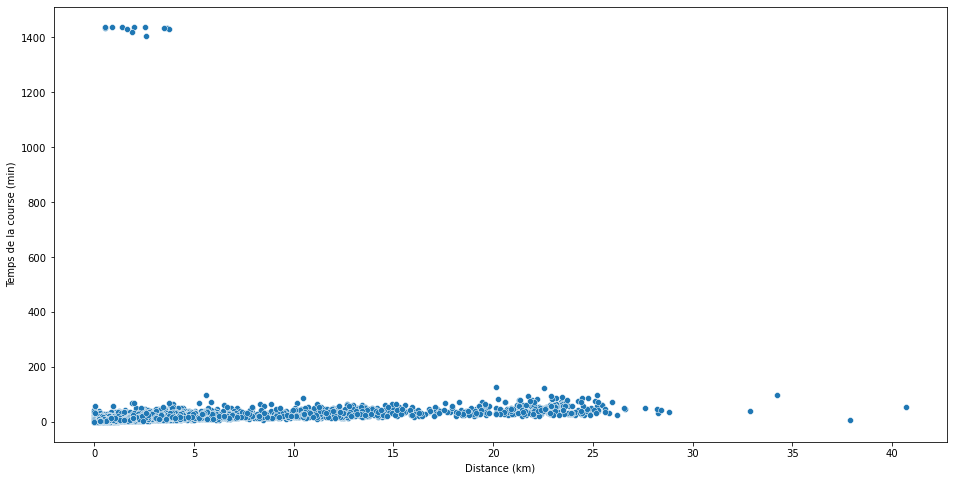

In [33]:
sns.scatterplot(x=df_sample['distance'], y=(df_sample['trip_duration'] / 60))
plt.xlabel('Distance (km)')
plt.ylabel('Temps de la course (min)')
fig = plt.gcf()

fig.set_size_inches(16,8)

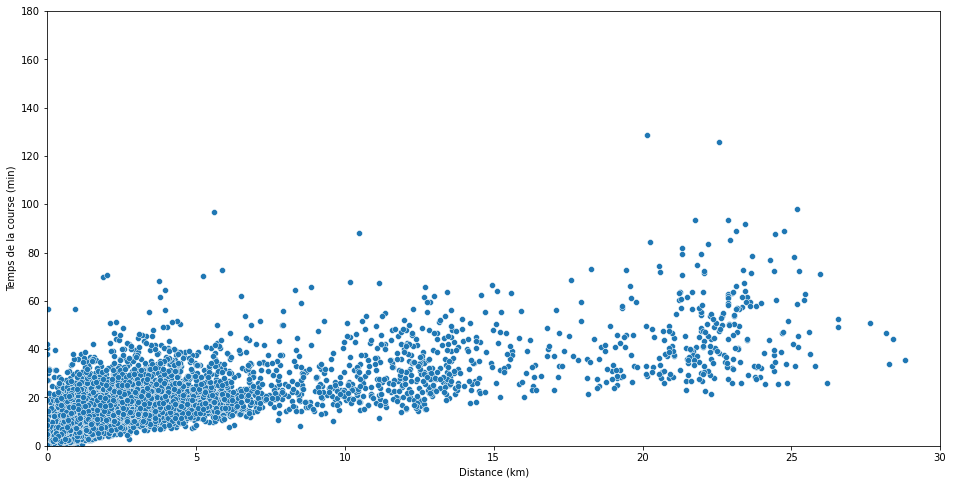

In [31]:
sns.scatterplot(x=df_sample['distance'], y=(df_sample['trip_duration'] / 60))
plt.xlim(0, 30)
plt.ylim(0, 180)
plt.xlabel('Distance (km)')
plt.ylabel('Temps de la course (min)')
fig = plt.gcf()

fig.set_size_inches(16,8)

## 4. Choix du modèle de machine learning

Nous proposons de choisir un modèle de régression linéaire.


## 5. Préparation des données

### 5.a échantillonage

Le jeu de données étant grand, nous utilisons un échantillon de 10000 lignes.

In [36]:
df_reg = df.sample(10000)


### 5.b Sélection de la variable cible et des variables explicatives

Nous limitons la distance à 30 km et le temps à 10,000 secondes,pour conserver uniquement les valeurs les plus pertinentes à notre modèle de régression linéaire.

In [37]:
df_reg = df_reg[df_reg['distance'] < 30]
df_reg = df_reg[df_reg['trip_duration'] < 10000]

On définit la variable cible

In [38]:
y = df_reg['trip_duration']

et notre variable explicative.

In [42]:
X = df_reg[['distance']]

## 6. Division du jeu de données en training/validation/testing sets

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)


## 7. Apprentissage sur le training set

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [45]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

print("\n")

print("On comprend donc que chaque course dure {} secondes auquel il faut ajouter {} € par mètre carré"
     .format(round(regr.intercept_),round(regr.coef_[0],2)))

Le coefficient β1 est égal à 112.41 tandis que l'intercept β0 est égal à 524


On comprend donc que tout appartement parisien coute 524 € auquel il faut ajouter 112.41 € par mètre carré


In [47]:
x_to_predict = 5
x_df =  pd.DataFrame({'surface': [x_to_predict]})

print("Selon le modèle, un {} m2 à Paris doit avoir un loyer de {} €"
      .format(x_to_predict, round(regr.predict(x_df)[0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, un 5 m2 à Paris doit avoir un loyer de 1086 €


On remarque que 5 * 112.41 + 524 = 1086.05


## 8. Evaluation du modèle sur le testing set